In [1]:
import glob
import os
import pandas as pd
import numpy as np
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../Forecasting/final_dataset.csv')
df.head()

,Month,Anti-social behaviour,Public order,Sun_Hours
0,2017-01,129.0,15.0,2.1
1,2017-02,146.0,20.0,2.0
2,2017-03,179.0,15.0,3.8
3,2017-04,152.0,17.0,6.0
4,2017-05,NaN,17.0,6.3


In [3]:
df['ds'] = pd.to_datetime(df['Month'], format='%Y-%m')
df_antisocial = df[["ds", "Anti-social behaviour", "Sun_Hours"]]
df_antisocial = df_antisocial.rename(columns={"Anti-social behaviour": "y"})
train_antisocial = df_antisocial[df_antisocial.ds.dt.year <= 2020]
test_antisocial = df_antisocial[df_antisocial.ds.dt.year == 2021]

df_publicorder = df[["ds", "Public order", "Sun_Hours"]]
df_publicorder = df_publicorder.rename(columns={"Public order": "y"})
train_publicorder = df_publicorder[df_publicorder.ds.dt.year <= 2020]
test_publicorder = df_publicorder[df_publicorder.ds.dt.year == 2021]
train_publicorder.head()

,ds,y,Sun_Hours
0,2017-01-01,15.0,2.1
1,2017-02-01,20.0,2.0
2,2017-03-01,15.0,3.8
3,2017-04-01,17.0,6.0
4,2017-05-01,17.0,6.3


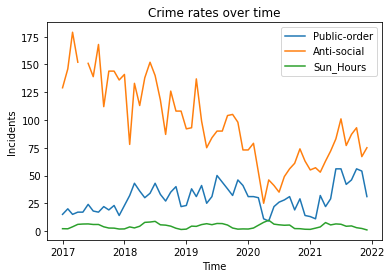

In [4]:
plt.plot(df['ds'], df['Public order'], label="Public-order")
plt.plot(df['ds'], df['Anti-social behaviour'], label="Anti-social")
plt.plot(df['ds'], df['Sun_Hours'], label="Sun_Hours")
plt.legend()
plt.title("Crime rates over time")
plt.ylabel("Incidents")
plt.xlabel("Time")
plt.gcf().set_facecolor('white');

## Public order model
Train a prophet model with Sun_Hours as extra regressor

In [5]:
m_publicorder = Prophet()
m_publicorder.add_regressor('Sun_Hours')
m_publicorder.fit(train_publicorder)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -64.1695


Iteration  1. Log joint probability =    28.0277. Improved by 92.1972.
Iteration  2. Log joint probability =    54.8687. Improved by 26.841.
Iteration  3. Log joint probability =    62.9804. Improved by 8.11178.
Iteration  4. Log joint probability =    63.2673. Improved by 0.286856.
Iteration  5. Log joint probability =    63.3341. Improved by 0.0668295.
Iteration  6. Log joint probability =    63.3364. Improved by 0.00228487.
Iteration  7. Log joint probability =    63.3443. Improved by 0.00786992.
Iteration  8. Log joint probability =    63.3598. Improved by 0.0154857.
Iteration  9. Log joint probability =    63.3655. Improved by 0.00569467.
Iteration 10. Log joint probability =    63.3702. Improved by 0.00474715.
Iteration 11. Log joint probability =    63.3792. Improved by 0.00899089.
Iteration 12. Log joint probability =    63.3845. Improved by 0.00531062.
Iteration 13. Log joint probability =    63.3884. Improved by 0.00385392.
Iteration 14. Log joint probability =    63.3907. Im

### Predictions of test set

/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


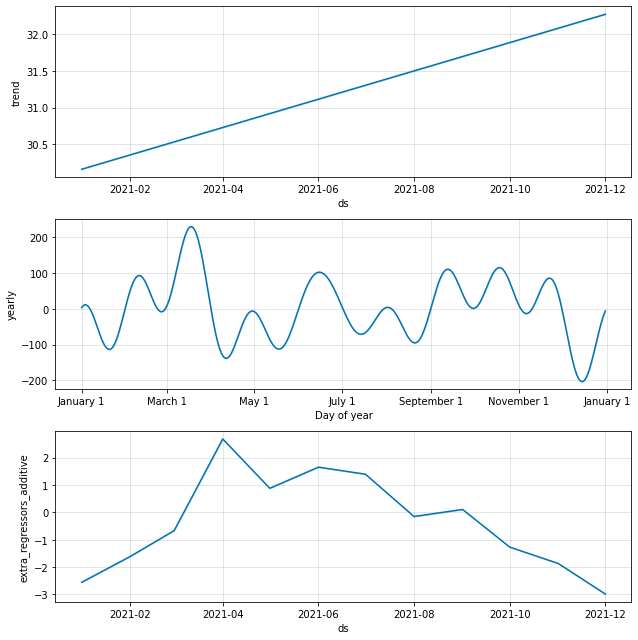

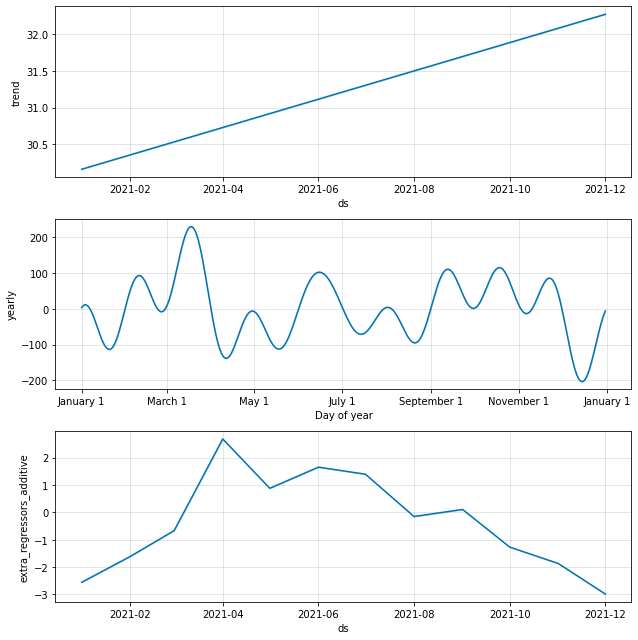

In [6]:
predict = m_publicorder.predict(test_publicorder)
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
m_publicorder.plot_components(predict)

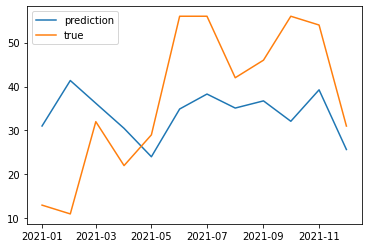

In [7]:
plt.plot(predict['ds'], predict['yhat'], label='prediction')
plt.plot(test_publicorder['ds'], test_publicorder['y'], label='true')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2: " + str(r2_score(test_publicorder['y'], predict['yhat'])))
print("MAE: " + str(mean_absolute_error(test_publicorder['y'], predict['yhat'])))
print("MSE: " + str(mean_squared_error(test_publicorder['y'], predict['yhat'])))

predict['error'] = test_publicorder['y'] - predict['yhat']
predict.head()

R2: 0.002146144922117177
MAE: 13.752972155076208
MSE: 256.004950152759


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Sun_Hours,Sun_Hours_lower,Sun_Hours_upper,additive_terms,...,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,error
0,2021-01-01,30.163017,20.618389,42.132507,30.162996,30.163038,-2.556793,-2.556793,-2.556793,0.849556,...,-2.556793,-2.556793,3.406349,3.406349,3.406349,0.0,0.0,0.0,31.012574,NaN
1,2021-02-01,30.358590,31.209465,51.819391,30.358506,30.358670,-1.612086,-1.612086,-1.612086,11.010499,...,-1.612086,-1.612086,12.622585,12.622585,12.622585,0.0,0.0,0.0,41.369089,NaN
2,2021-03-01,30.535237,26.717110,46.348956,30.535084,30.535399,-0.667378,-0.667378,-0.667378,5.653945,...,-0.667378,-0.667378,6.321324,6.321324,6.321324,0.0,0.0,0.0,36.189182,NaN
3,2021-04-01,30.730810,20.515753,40.403027,30.730537,30.731082,2.682038,2.682038,2.682038,-0.250649,...,2.682038,2.682038,-2.932687,-2.932687,-2.932687,0.0,0.0,0.0,30.480161,NaN
4,2021-05-01,30.920074,13.562044,34.204484,30.919699,30.920463,0.878506,0.878506,0.878506,-6.908010,...,0.878506,0.878506,-7.786516,-7.786516,-7.786516,0.0,0.0,0.0,24.012064,NaN


### Predictions over train set

/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


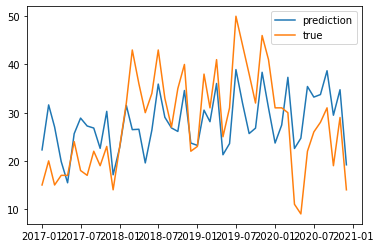

In [9]:
predict = m_publicorder.predict(train_publicorder[['ds', 'Sun_Hours']])
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
plt.plot(predict['ds'], predict['yhat'], label='prediction')
plt.plot(train_publicorder['ds'], train_publicorder['y'], label='true')
plt.legend()
plt.show()

## Anti-social behaviour model

In [10]:
m_antisocial = Prophet()
m_antisocial.add_regressor('Sun_Hours')
m_antisocial.fit(train_antisocial)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -61.0085
Iteration  1. Log joint probability =    34.9954. Improved by 96.0039.
Iteration  2. Log joint probability =    68.9767. Improved by 33.9813.
Iteration  3. Log joint probability =    70.2318. Improved by 1.25515.
Iteration  4. Log joint probability =     70.235. Improved by 0.00315117.
Iteration  5. Log joint probability =     70.264. Improved by 0.0290439.
Iteration  6. Log joint probability =    70.3616. Improved by 0.0975524.
Iteration  7. Log joint probability =    70.4127. Improved by 0.0511155.
Iteration  8. Log joint probability =    70.4371. Improved by 0.0244414.
Iteration  9. Log joint probability =    70.4803. Improved by 0.0431171.
Iteration 10. Log joint probability =    70.5331. Improved by 0.05285.
Iteration 11. Log joint probability =    70.7001. Improved by 0.166943.
Iteration 12. Log joint probability =    70.7715. Improved by 0.0714466.
Iteration 13. Log joint probability =    70.8769. Improved by 0.10544.
Iteration 14. Log j

 6.67512.
Iteration 15. Log joint probability =    77.5788. Improved by 0.0267474.
Iteration 16. Log joint probability =    77.5855. Improved by 0.0066669.
Iteration 17. Log joint probability =    77.6379. Improved by 0.0524654.
Iteration 18. Log joint probability =    77.6896. Improved by 0.0516573.
Iteration 19. Log joint probability =    78.1578. Improved by 0.468234.
Iteration 20. Log joint probability =    78.2137. Improved by 0.0558782.
Iteration 21. Log joint probability =    78.2234. Improved by 0.00966381.
Iteration 22. Log joint probability =     78.611. Improved by 0.387644.
Iteration 23. Log joint probability =    79.1247. Improved by 0.513685.
Iteration 24. Log joint probability =    79.6688. Improved by 0.544056.
Iteration 25. Log joint probability =    79.7022. Improved by 0.0334946.
Iteration 26. Log joint probability =    82.4553. Improved by 2.75304.
Iteration 27. Log joint probability =    84.0689. Improved by 1.61363.
Iteration 28. Log joint probability =    84.4781

/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


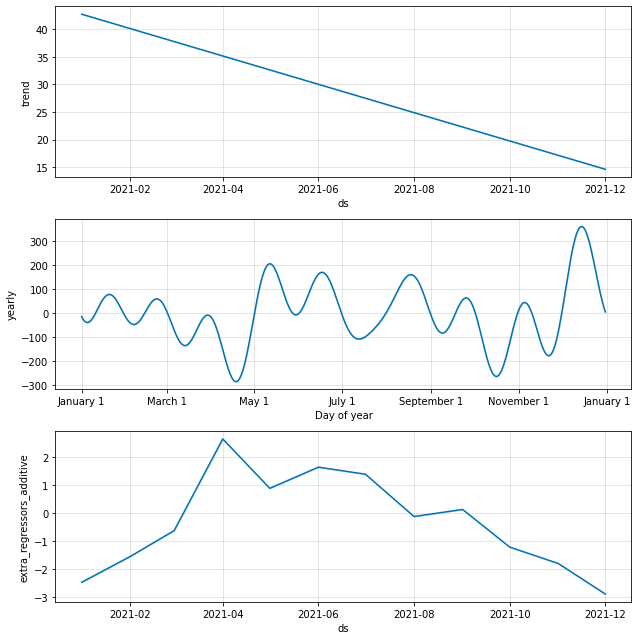

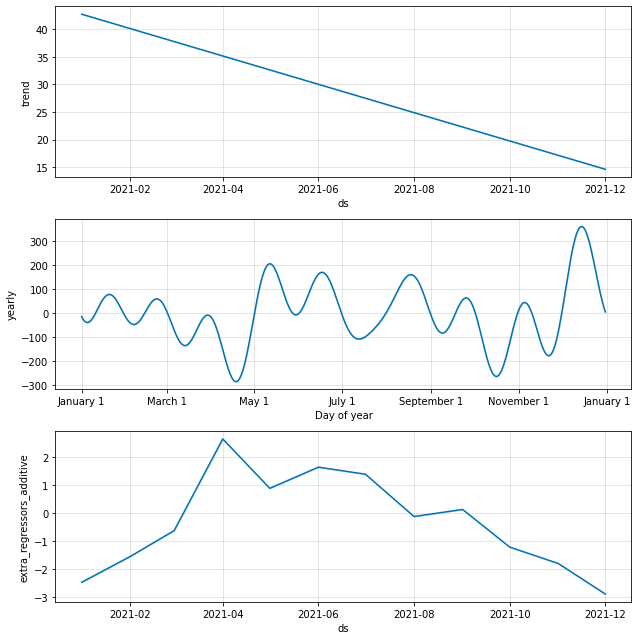

In [11]:
predict = m_antisocial.predict(test_antisocial[['ds', 'Sun_Hours']])
m_antisocial.plot_components(predict)

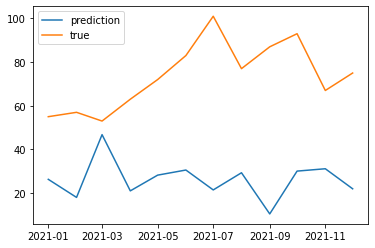

In [12]:
plt.plot(predict['ds'], predict['yhat'], label='prediction')
plt.plot(test_antisocial['ds'], test_antisocial['y'], label='true')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2: " + str(r2_score(test_antisocial['y'], predict['yhat'])))
print("MAE: " + str(mean_absolute_error(test_antisocial['y'], predict['yhat'])))
print("MSE: " + str(mean_squared_error(test_antisocial['y'], predict['yhat'])))

predict['error'] = test_publicorder['y'] - predict['yhat']
predict['error'].head()

R2: -10.9870107550995
MAE: 47.3015473275089
MSE: 2610.0883487926726


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: error, dtype: float64

/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mahmutcanaridasir/opt/anaconda3/envs/python38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


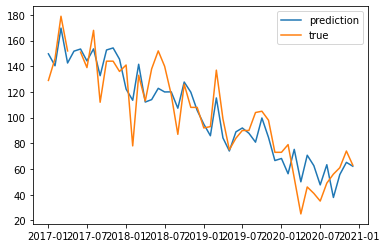

In [14]:
predict = m_antisocial.predict(train_antisocial[['ds', 'Sun_Hours']])
predict[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
plt.plot(predict['ds'], predict['yhat'], label='prediction')
plt.plot(train_antisocial['ds'], train_antisocial['y'], label='true')
plt.legend()
plt.show()